In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import cv2
import shutil

Using plaidml.keras.backend backend.


'./test/test/test.png'

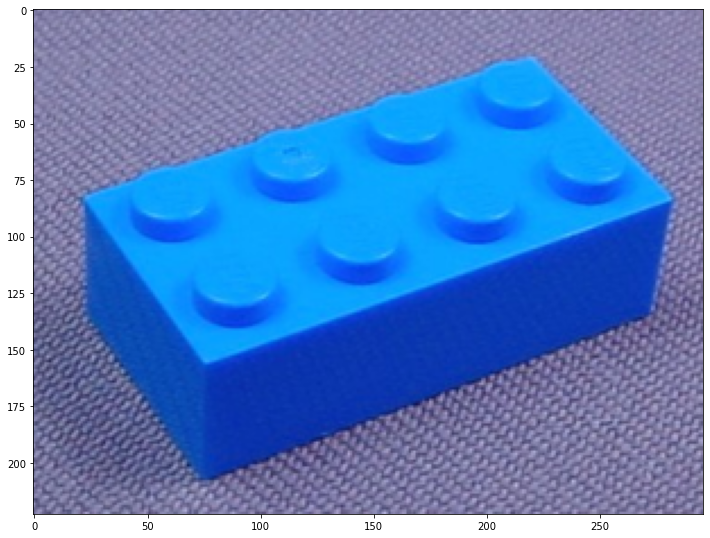

In [3]:
#image_path = "../../LEGO_brick_images_v1/3003 Brick 2x2/0002.png"
image_path = "./orange_brick.png"
test_dir = "./test"
test_path = "./test/test/test.png"
image = cv2.imread(image_path)
plt.figure(figsize=(12,12))
plt.imshow(image)

shutil.copyfile(image_path, test_path)

In [4]:
from keras.preprocessing.image import ImageDataGenerator

def shifter(image):
    for row in image:
        for cell in row:
            cell = np.roll(cell,1)
    return image

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=10,
    zoom_range=0.1,
    height_shift_range=0.1,
    width_shift_range=0.1,
    brightness_range=[0.5,1],
    rotation_range=45,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=shifter
)

train_generator = train_datagen.flow_from_directory(test_dir, target_size=(200,200), shuffle=True, class_mode="categorical")

C:\Users\Anto\anaconda3\envs\lego_jupyter_fuckup\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Anto\anaconda3\envs\lego_jupyter_fuckup\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Anto\anaconda3\envs\lego_jupyter_fuckup\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Anto\anaconda3\envs\lego_

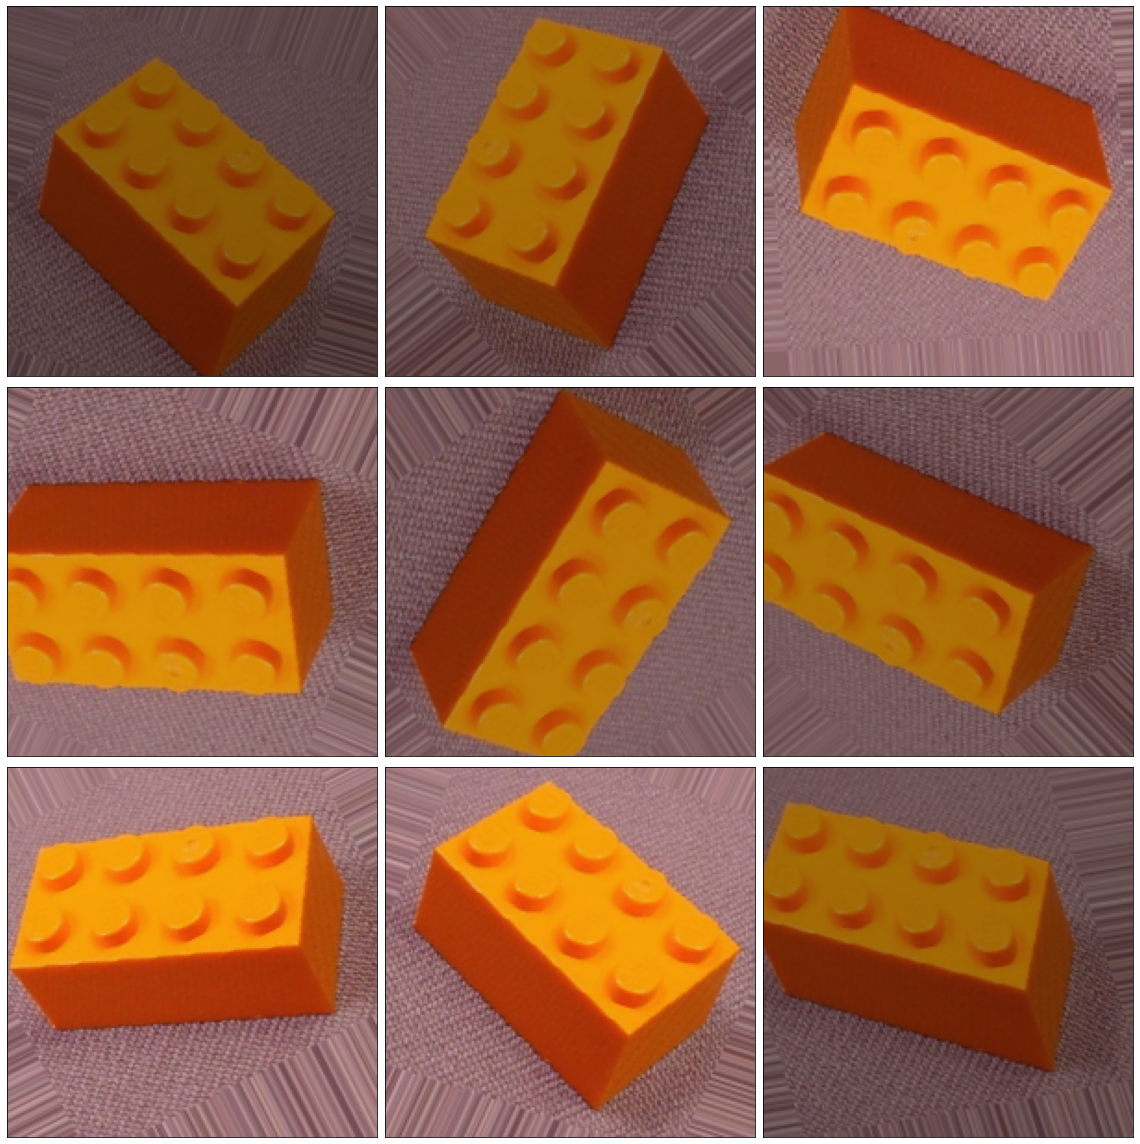

In [5]:
plt.figure(figsize=(16,16))

for i in range(9):
    plt.subplot(330+1+i)
    plt.tick_params(
        axis="both",
        which = "both",
        bottom=False,
        top=False,
        left=False,
        right=False,
        labelleft=False,
        labelbottom=False
    )
    batch = train_generator.next()[0]
    plt.imshow(batch[0])
plt.tight_layout()
plt.savefig("AAA.png", transparent=True)
plt.show()